In [55]:
# https://predictivehacks.com/beginners-guide-predict-the-stock-market/
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

In [56]:
# datoer er YYYY-MM-DD
df = yf.download('TSLA', start='2020-06-01', end='2022-06-01', progress=False)
df_close = df[['Close']]
df_close


,Close
Date,
2020-06-01,179.619995
2020-06-02,176.311996
2020-06-03,176.591995
2020-06-04,172.876007
2020-06-05,177.132004
...,...
2021-05-28,625.219971
2021-06-01,623.900024
2021-06-02,605.119995


In [57]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02
mean,528.179048,540.733757,513.825719,528.343827,528.343827,5.018956e+07
std,197.175129,200.177519,192.938555,196.812799,196.812799,2.910476e+07
min,171.600006,177.304001,170.820007,172.876007,172.876007,1.515770e+07
25%,391.654999,406.632507,372.979988,397.284500,397.284500,2.990595e+07
50%,562.220001,581.424988,546.174988,568.209991,568.209991,4.092395e+07
75%,684.867523,699.889999,667.465027,678.320007,678.320007,6.467862e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


<ipython-input-58-2524354f9f55>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Open', 'High',


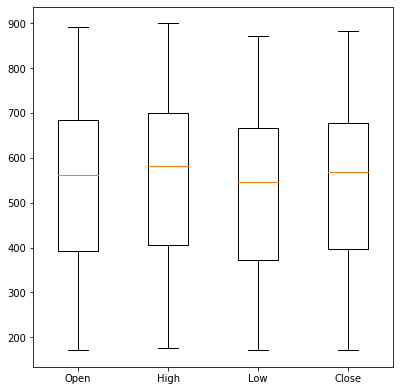

In [58]:
data_1 = df['Open'];
data_2 = df['High'];
data_3 = df['Low'];
data_4 = df['Close'];
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(5, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# x-axis labels
ax.set_xticklabels(['Open', 'High',
                    'Low', 'Close'])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [59]:
# We only need the column Close that is the value that we want to predict. Our goal now is to transform the data so we can feed them into our Machine Learning model. We want to have as features the last 10 closing prices. The easiest way to do it is to use the shift function of Pandas.
# Vi går fra 1 kolonne med 252 rækker til 11 kolonner med 242 rækker. 242 pga. dropna. (axis = 1)

df_close_shifted = pd.concat([df_close, df_close.shift(), df_close.shift(2), df_close.shift(3), df_close.shift(4), df_close.shift(5), df_close.shift(6), df_close.shift(7), df_close.shift(8), df_close.shift(9), df_close.shift(10)], axis=1).dropna()

print(df_close_shifted)

                 Close       Close       Close       Close       Close  \
Date                                                                     
2020-06-15  198.179993  187.056000  194.567993  205.009995  188.134003   
2020-06-16  196.425995  198.179993  187.056000  194.567993  205.009995   
2020-06-17  198.358002  196.425995  198.179993  187.056000  194.567993   
2020-06-18  200.792007  198.358002  196.425995  198.179993  187.056000   
2020-06-19  200.179993  200.792007  198.358002  196.425995  198.179993   
...                ...         ...         ...         ...         ...   
2021-05-28  625.219971  630.849976  619.130005  604.690002  606.440002   
2021-06-01  623.900024  625.219971  630.849976  619.130005  604.690002   
2021-06-02  605.119995  623.900024  625.219971  630.849976  619.130005   
2021-06-03  572.840027  605.119995  623.900024  625.219971  630.849976   
2021-06-04  599.049988  572.840027  605.119995  623.900024  625.219971   

                 Close       Close   

In [60]:
df_close_shifted.columns = list(range(0,11))
df_close_shifted.rename(columns={0:'actual_stock_prices'}, inplace=True)
df_close_shifted

,actual_stock_prices,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-06-15,198.179993,187.056000,194.567993,205.009995,188.134003,189.983994,177.132004,172.876007,176.591995,176.311996,179.619995
2020-06-16,196.425995,198.179993,187.056000,194.567993,205.009995,188.134003,189.983994,177.132004,172.876007,176.591995,176.311996
2020-06-17,198.358002,196.425995,198.179993,187.056000,194.567993,205.009995,188.134003,189.983994,177.132004,172.876007,176.591995
2020-06-18,200.792007,198.358002,196.425995,198.179993,187.056000,194.567993,205.009995,188.134003,189.983994,177.132004,172.876007
2020-06-19,200.179993,200.792007,198.358002,196.425995,198.179993,187.056000,194.567993,205.009995,188.134003,189.983994,177.132004
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,625.219971,630.849976,619.130005,604.690002,606.440002,580.880005,586.780029,563.460022,577.869995,576.830017,589.739990
2021-06-01,623.900024,625.219971,630.849976,619.130005,604.690002,606.440002,580.880005,586.780029,563.460022,577.869995,576.830017
2021-06-02,605.119995,623.900024,625.219971,630.849976,619.130005,604.690002,606.440002,580.880005,586.780029,563.460022,577.869995


In [61]:
# split data i train og test, vi vil forsøge at forudsige de sidste 10 dage.
train = df_close_shifted.head(len(df_close_shifted) - 10)
test = df_close_shifted.tail(10)

<ipython-input-62-a62e47192d3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = lr.predict(test[list(range(1,11))])


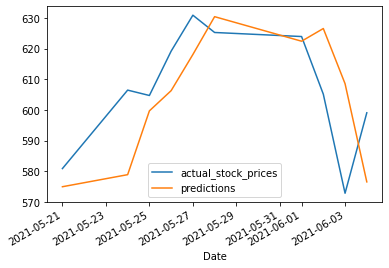

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fit med X værende kolonnerne 1-10, y er kolonne 0
lr.fit(train[list(range(1,11))], train['actual_stock_prices'])

# lad os predicte med test sættets kolonner 1,10, tilføj forudsigelserne som en kolonne til testsættet kaldt 'predictions'
test['predictions'] = lr.predict(test[list(range(1,11))])
# print(len(test['predictions']))
ax=test[['actual_stock_prices', 'predictions']].plot()

In [63]:
def predictNextDay(symbol:str, saveModel:bool = False):
    import yfinance as yf
    import pandas as pd
    df = yf.download(symbol, start='2019-01-07', end='2021-01-07', progress=False)[['Close']]
    df = pd.concat([df, df.shift(), df.shift(2), df.shift(3), df.shift(4), df.shift(5),           df.shift(6), df.shift(7), df.shift(8), df.shift(9), df.shift(10)], axis=1).dropna()

    df.columns = list(range(0,11))
    df.rename(columns={0:'actual_stock_prices'}, inplace=True)

    train = df.head(len(df)-10)
    test = df.tail(10)

    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(train[list(range(1,11))], train['actual_stock_prices'])

    if saveModel:
        import pickle
        with open(symbol + '_linear_reg_model', 'wb') as file:
            pickle.dump(lr, file)

    test['predictions'] = lr.predict(test.tail(10)[list(range(1,11))])
    ax = test[['actual_stock_prices', 'predictions']].plot()
    return(ax)


<ipython-input-63-71c10ed0031e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = lr.predict(test.tail(10)[list(range(1,11))])


<AxesSubplot:xlabel='Date'>

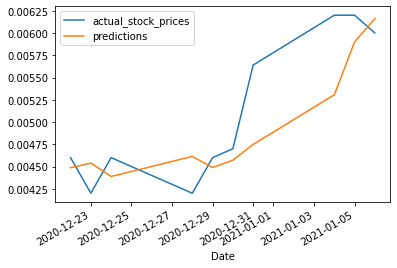

In [64]:
predictNextDay('AMAZ')
#predictNextDay('TSLA', True)
#predictNextDay('VEST', True)
#predictNextDay('GOGL')
#predictNextDay('MAERSK-B.CO')

In [65]:
"""def predictFuture2(symbol:str, lengthOfFuture:int):
    df = yf.download(symbol, start='2020-01-07', end='2021-01-07', progress=False)[['Close']]
    df = pd.concat([df, df.shift(), df.shift(2), df.shift(3), df.shift(4), df.shift(5), df.shift(6), df.shift(7), df.shift(8), df.shift(9), df.shift(10)], axis=1).dropna()

    df.columns = list(range(0,11))
    df.rename(columns={0:'actual_stock_prices'}, inplace=True)

    train = df.head(len(df)-10)
    test = df.tail(10)

    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()

    predictions = []
    for i in range(0, lengthOfFuture):
        lr.fit(train[list(range(1,11))], train['actual_stock_prices'])

        prediction = lr.predict
    test['predictions'] = lr.predict(test.tail(10)[list(range(1,11))])
    ax = test[['actual_stock_prices', 'predictions']].plot()
    return(ax)"""

"def predictFuture2(symbol:str, lengthOfFuture:int):\n    df = yf.download(symbol, start='2020-01-07', end='2021-01-07', progress=False)[['Close']]\n    df = pd.concat([df, df.shift(), df.shift(2), df.shift(3), df.shift(4), df.shift(5), df.shift(6), df.shift(7), df.shift(8), df.shift(9), df.shift(10)], axis=1).dropna()\n\n    df.columns = list(range(0,11))\n    df.rename(columns={0:'actual_stock_prices'}, inplace=True)\n\n    train = df.head(len(df)-10)\n    test = df.tail(10)\n\n    from sklearn.linear_model import LinearRegression\n    lr = LinearRegression()\n\n    predictions = []\n    for i in range(0, lengthOfFuture):\n        lr.fit(train[list(range(1,11))], train['actual_stock_prices'])\n\n        prediction = lr.predict\n    test['predictions'] = lr.predict(test.tail(10)[list(range(1,11))])\n    ax = test[['actual_stock_prices', 'predictions']].plot()\n    return(ax)"

In [66]:
"""def predictFuture(symbol:str, lengthOfFuture:int):
    import yfinance as yf
    import datetime
    import random
    df = yf.download(symbol, start='2020-01-07', end='2021-01-07', progress=False)[['Close']]

    train = df.head(len(df)-10)
    # print(train)
    # print(train.shape) # (244,1)
    test = df.tail(10)
    
    # print(test.shape) # (10,1)
    
    from sklearn.linear_model import LinearRegression
    import pandas as pd

    predictions = []
    lr = LinearRegression()

    # train the model.
    x = pd.concat([train, train.shift(), train.shift(2), train.shift(3), train.shift(4), train.shift(5), train.shift(6), train.shift(7), train.shift(8), train.shift(9)], axis=1).dropna().tail(1)
    x.columns=range(0,10)
    # print(x.head())
    lr.fit(x[list(range(1,10))], x[0]) # her fittes med shape(1,9), shape(1,)        

    for i in range(0, lengthOfFuture):         
        x = pd.concat([train, train.shift(), train.shift(2), train.shift(3), train.shift(4), train.shift(5), train.shift(6), train.shift(7), train.shift(8), train.shift(9)], axis=1).dropna().tail(1)
        # print(x.shape)
        print("sidste dag:", x)
        x.columns = range(0,10) # renames columns? x har shape (1,10)               
        
        lr.fit(x[list(range(1,10))], x[0]) # her fittes med shape(1,9), shape(1,)        
        #predict 
        #predictWith = x[list(range(1,10))]       
        predictWith = [[random.random() * 1000 for _ in range(1,10)]]
        print("will predict with:", predictWith)        
        pred = None
        pred = lr.predict(predictWith) # Her skal vi predicte med shape (1,9)
        print("resultat af prediction: ",pred) 
        predictions.append(pred[0])
        train = pd.concat([train, pd.DataFrame({'Close':pred}, index=[train.tail(1).index[0]+datetime.timedelta(days=1)])])

    test['predictions'] = predictions
    ax = test.plot()
    return(ax)
"""

'def predictFuture(symbol:str, lengthOfFuture:int):\n    import yfinance as yf\n    import datetime\n    import random\n    df = yf.download(symbol, start=\'2020-01-07\', end=\'2021-01-07\', progress=False)[[\'Close\']]\n\n    train = df.head(len(df)-10)\n    # print(train)\n    # print(train.shape) # (244,1)\n    test = df.tail(10)\n    \n    # print(test.shape) # (10,1)\n    \n    from sklearn.linear_model import LinearRegression\n    import pandas as pd\n\n    predictions = []\n    lr = LinearRegression()\n\n    # train the model.\n    x = pd.concat([train, train.shift(), train.shift(2), train.shift(3), train.shift(4), train.shift(5), train.shift(6), train.shift(7), train.shift(8), train.shift(9)], axis=1).dropna().tail(1)\n    x.columns=range(0,10)\n    # print(x.head())\n    lr.fit(x[list(range(1,10))], x[0]) # her fittes med shape(1,9), shape(1,)        \n\n    for i in range(0, lengthOfFuture):         \n        x = pd.concat([train, train.shift(), train.shift(2), train.shift(3)

In [69]:
#predictFuture('TSLA', 10)